In [1]:
import scanpy as sc
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import scanpy.external as sce
import sys
import scFates as scf

In [2]:
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor='white')
sns.set_style("ticks")

scanpy==1.10.2 anndata==0.10.8 umap==0.5.6 numpy==1.26.4 scipy==1.11.4 pandas==2.2.2 scikit-learn==1.5.1 statsmodels==0.14.2 igraph==0.11.8 pynndescent==0.5.13


In [3]:
adata=sc.read('e8_e8_5_SUBSET_umap_DONE.h5ad')

/home/julia/miniconda3/envs/Scanpy/lib/python3.12/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [4]:
adata

AnnData object with n_obs × n_vars = 32171 × 24684
    obs: 'plate', 'day', 'location', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'n_genes', 'doublet_score', 'predicted_doublet', 'batch', 'leiden', 'cluster_annotations'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'cluster_annotations_colors', 'day_colors', 'hvg', 'leiden', 'leiden_colors', 'location_colors', 'log1p', 'neighbors', 'pca', 'rank_genes_groups', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

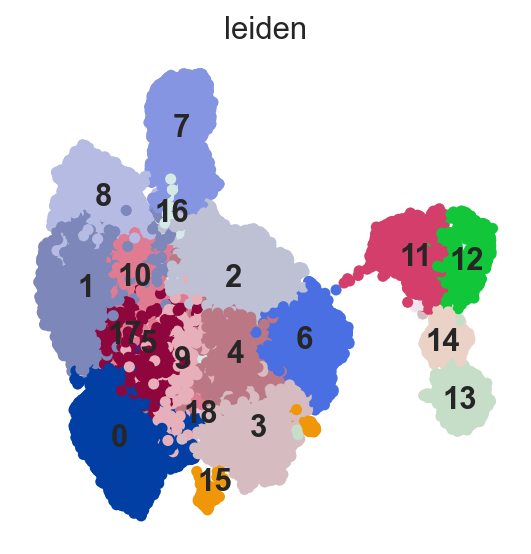

In [5]:
sc.pl.umap(adata, color=['leiden', ], size=100, frameon=False, legend_loc='on data')

In [6]:
adata.obs.head(4)

,plate,day,location,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,n_genes,doublet_score,predicted_doublet,batch,leiden,cluster_annotations
AAACCCAAGGTTCCAT-1,P27217_1001,e_8.5,head,7550,48373.0,777.0,1.606268,7550,0.074842,False,0,12,Neural tube
AAACCCAGTAAGTAGT-1,P27217_1001,e_8.5,head,7495,56462.0,1376.0,2.437037,7495,0.053381,False,0,3,Placodes
AAACCCAGTCGAGATG-1,P27217_1001,e_8.5,head,7745,51452.0,878.0,1.706445,7745,0.015994,False,0,11,Neural tube
AAACCCATCTTTCTAG-1,P27217_1001,e_8.5,head,6427,34047.0,289.0,0.848827,6427,0.017893,False,0,11,Neural tube


In [7]:
adata1=sc.read('/home/julia/Placodes_Alia/adata_epcam_cluster_annotation.h5ad')

In [8]:
adata1

AnnData object with n_obs × n_vars = 42129 × 25865
    obs: 'plate', 'day', 'location', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'n_genes', 'doublet_score', 'predicted_doublet', 'batch', 'leiden', 'cluster_annotations'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'cluster_annotations_colors', 'day_colors', 'hvg', 'leiden', 'leiden_colors', 'location_colors', 'log1p', 'neighbors', 'pca', 'plate_colors', 'rank_genes_groups', 'umap'
    obsm: 'X_pca', 'X_umap'
    obsp: 'connectivities', 'distances'

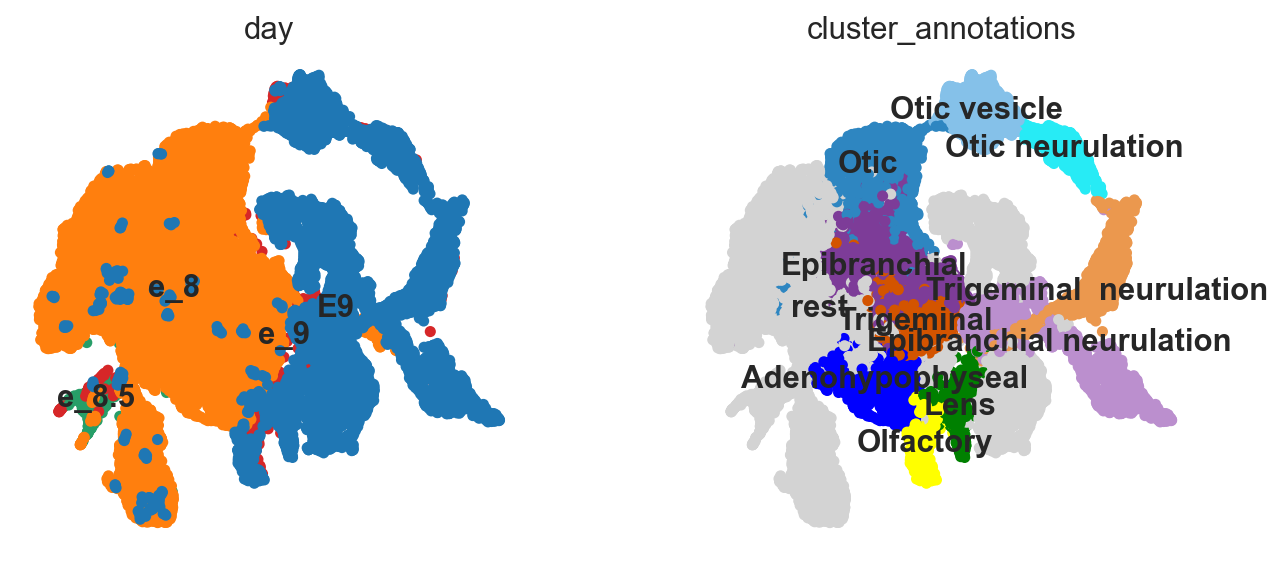

In [9]:
sc.pl.umap(adata1, color=['day','cluster_annotations' ], size=100, frameon=False, legend_loc='on data')

In [10]:
adata1.obs.head(4)

,plate,day,location,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,n_genes,doublet_score,predicted_doublet,batch,leiden,cluster_annotations
AAACGAAGTTGAGAGC-1,P27217_1001,e_8.5,head,5421,16533.0,549.0,3.320632,5421,0.014815,False,0,38,rest
AAACGCTGTCCGACGT-1,P27217_1001,e_8.5,head,6952,38981.0,782.0,2.006105,6952,0.017241,False,0,38,rest
AAAGGATTCAAGTTGC-1,P27217_1001,e_8.5,head,4801,20852.0,458.0,2.196432,4801,0.044025,False,0,38,rest
AAAGGTAAGGGTACGT-1,P27217_1001,e_8.5,head,4666,15276.0,500.0,3.273108,4666,0.020701,False,0,31,rest


In [11]:
adata1.obs[
    (adata1.obs["day"] == "e_8.5") &(adata1.obs["cluster_annotations"].isin(["Lens"]))]


,plate,day,location,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,n_genes,doublet_score,predicted_doublet,batch,leiden,cluster_annotations


In [12]:
adata1.obs[
    (adata1.obs["day"] == "e_8.5") &(adata1.obs["cluster_annotations"].isin(["Olfactory"]))]


,plate,day,location,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,n_genes,doublet_score,predicted_doublet,batch,leiden,cluster_annotations


In [13]:
adata1.obs[
    (adata1.obs["day"] == "E9") &(adata1.obs["cluster_annotations"].isin(["Lens", "Olfactory"]))]


,plate,day,location,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,n_genes,doublet_score,predicted_doublet,batch,leiden,cluster_annotations
AAACCCAGTAAGGCTG-1,E9_L003,E9,A,3488,9280.0,110.0,1.185345,3488,0.049257,False,11,22,Lens
AAACGCTAGCCATATC-1,E9_L003,E9,A,5421,18241.0,233.0,1.277342,5422,0.084862,False,11,22,Lens
AAACGCTGTCGAGTGA-1,E9_L003,E9,A,3835,10204.0,259.0,2.538220,3835,0.041345,False,11,22,Lens
AAAGAACAGTTCTACG-1,E9_L003,E9,A,3986,10457.0,165.0,1.577891,3988,0.022200,False,11,22,Lens
AAAGTCCAGACTCCGC-1,E9_L003,E9,A,3828,10788.0,242.0,2.243233,3828,0.051530,False,11,22,Lens
...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTACGTCAGTCCGTG-1-3,E9_L006,E9,A,3740,8971.0,220.0,2.452347,3740,0.065880,False,14,35,Olfactory
TTTACTGAGATCCAAA-1-3,E9_L006,E9,A,5733,20303.0,355.0,1.748510,5733,0.012573,False,14,22,Lens
TTTAGTCCAGCAGTCC-1-3,E9_L006,E9,A,4188,12038.0,422.0,3.505566,4188,0.086538,False,14,22,Lens
TTTGATCTCTCGCTCA-1-3,E9_L006,E9,A,4263,11884.0,71.0,0.597442,4263,0.042963,False,14,22,Lens


In [14]:
selected_annotations = ["Otic", "Epibranchial", "Trigeminal", "Olfactory", "Lens", "Adenohypophyseal"]


In [15]:
subset = adata1[adata1.obs["cluster_annotations"].isin(selected_annotations)].copy()


In [16]:
# Run neighbors on the selected subset
sc.pp.neighbors(subset)
sc.tl.leiden(subset, resolution=0.5)

subset.obs["subcluster"] = (
    subset.obs["cluster_annotations"].astype(str) + "_" + subset.obs["leiden"].astype(str))

computing neighbors
    using 'X_pca' with n_pcs = 100
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:31)
running Leiden clustering


/tmp/ipykernel_462492/4132681001.py:3: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(subset, resolution=0.5)


    finished: found 16 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:06)


In [17]:
subset.obs.head(5)

,plate,day,location,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,n_genes,doublet_score,predicted_doublet,batch,leiden,cluster_annotations,subcluster
AACCCAATCAGCTCTC-1,P27217_1001,e_8.5,head,5283,18334.0,779.0,4.248937,5283,0.021459,False,0,1,Trigeminal,Trigeminal_1
AATGACCAGGAGTACC-1,P27217_1001,e_8.5,head,6514,39394.0,795.0,2.018074,6514,0.020701,False,0,3,Epibranchial,Epibranchial_3
ACATCCCGTTGACTAC-1,P27217_1001,e_8.5,head,6789,34746.0,1145.0,3.295343,6789,0.027523,False,0,0,Otic,Otic_0
ACCCTCAAGCCACTCG-1,P27217_1001,e_8.5,head,6742,38994.0,531.0,1.361748,6742,0.071553,False,0,3,Epibranchial,Epibranchial_3
ACTTAGGCAAATCCCA-1,P27217_1001,e_8.5,head,6140,29992.0,573.0,1.910510,6140,0.015994,False,0,3,Epibranchial,Epibranchial_3


In [18]:
adata.obs["subcluster"] = "NA"

In [19]:
subset_barcodes = set(subset.obs_names)
adata_barcodes  = set(adata.obs_names)

overlap = subset_barcodes.intersection(adata_barcodes)
missing = subset_barcodes.difference(adata_barcodes)

print("Cells in subset: ", len(subset_barcodes))
print("Cells overlapping with adata: ", len(overlap))
print("Cells missing in adata: ", len(missing))


Cells in subset:  15136
Cells overlapping with adata:  3496
Cells missing in adata:  11640


In [20]:
intersecting = list(overlap)
adata.obs.loc[intersecting, "subcluster"] = subset.obs.loc[intersecting, "subcluster"]

In [21]:
adata.obs.head()

,plate,day,location,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,n_genes,doublet_score,predicted_doublet,batch,leiden,cluster_annotations,subcluster
AAACCCAAGGTTCCAT-1,P27217_1001,e_8.5,head,7550,48373.0,777.0,1.606268,7550,0.074842,False,0,12,Neural tube,NA
AAACCCAGTAAGTAGT-1,P27217_1001,e_8.5,head,7495,56462.0,1376.0,2.437037,7495,0.053381,False,0,3,Placodes,NA
AAACCCAGTCGAGATG-1,P27217_1001,e_8.5,head,7745,51452.0,878.0,1.706445,7745,0.015994,False,0,11,Neural tube,NA
AAACCCATCTTTCTAG-1,P27217_1001,e_8.5,head,6427,34047.0,289.0,0.848827,6427,0.017893,False,0,11,Neural tube,NA
AAACGAACATCCGCGA-1,P27217_1001,e_8.5,head,6575,45708.0,581.0,1.271112,6575,0.008488,False,0,14,Neural crest,NA


In [22]:
adata.obs["subcluster_simple"] = adata.obs["subcluster"].astype(str)

In [23]:
adata.obs["subcluster_simple"] = (
    adata.obs["subcluster_simple"]
    .str.replace(r"_\d+$", "", regex=True))

In [24]:
adata.obs["subcluster_simple"].unique()

array(['NA', 'Trigeminal', 'Epibranchial', 'Otic', 'Adenohypophyseal',
       'Olfactory'], dtype=object)

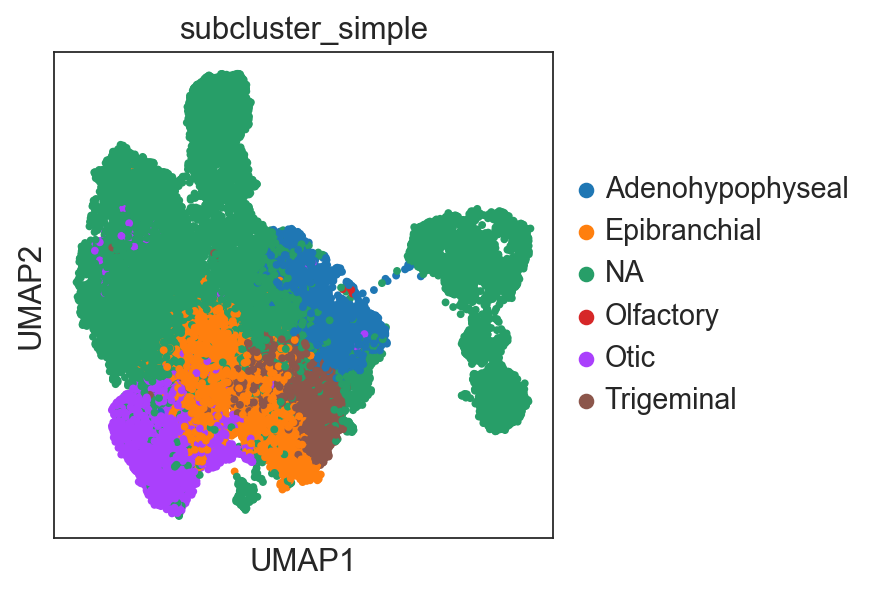

In [25]:
sc.pl.umap(adata, color="subcluster_simple", size=50)

In [26]:
adata2=adata.copy()

/home/julia/miniconda3/envs/Scanpy/lib/python3.12/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [27]:
adata2.obs["subcluster_simple"] = adata2.obs["subcluster_simple"].astype("category")

In [28]:
highlight_colors = {
    'Adenohypophyseal': 'blue',
    'Epibranchial': '#7d3c98',
    'Olfactory': 'yellow',
    'Otic': '#2e86c1',
    'Trigeminal': '#d35400',
    'NA': 'lightgray'
}


In [29]:
adata2.uns['subcluster_simple_colors'] = [
    highlight_colors.get(cat, 'lightgray')
    for cat in adata2.obs['subcluster_simple'].cat.categories
]

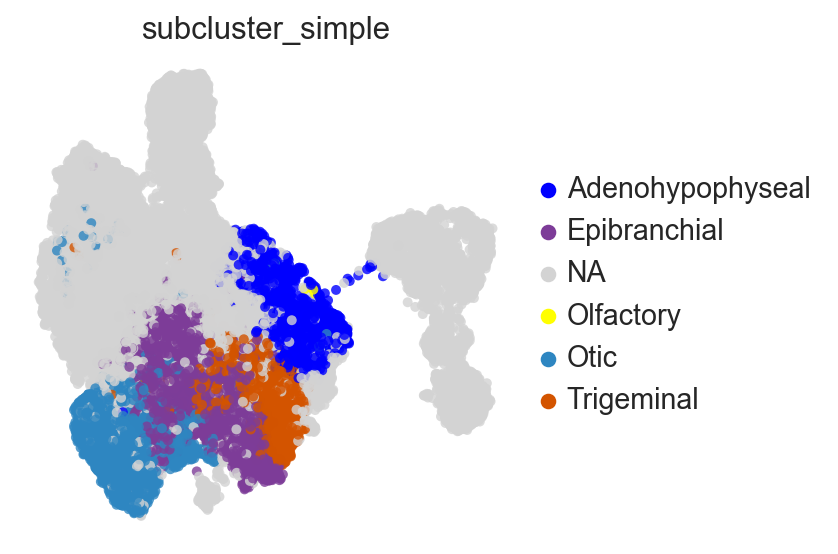

In [30]:
sc.pl.umap(
    adata2, 
    color='subcluster_simple',
    frameon=False, 
    size=80, 
    alpha=0.8, #save='E8_placodes_5_12_2025.svg'
)

In [31]:
adata=adata2.copy()

/home/julia/miniconda3/envs/Scanpy/lib/python3.12/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


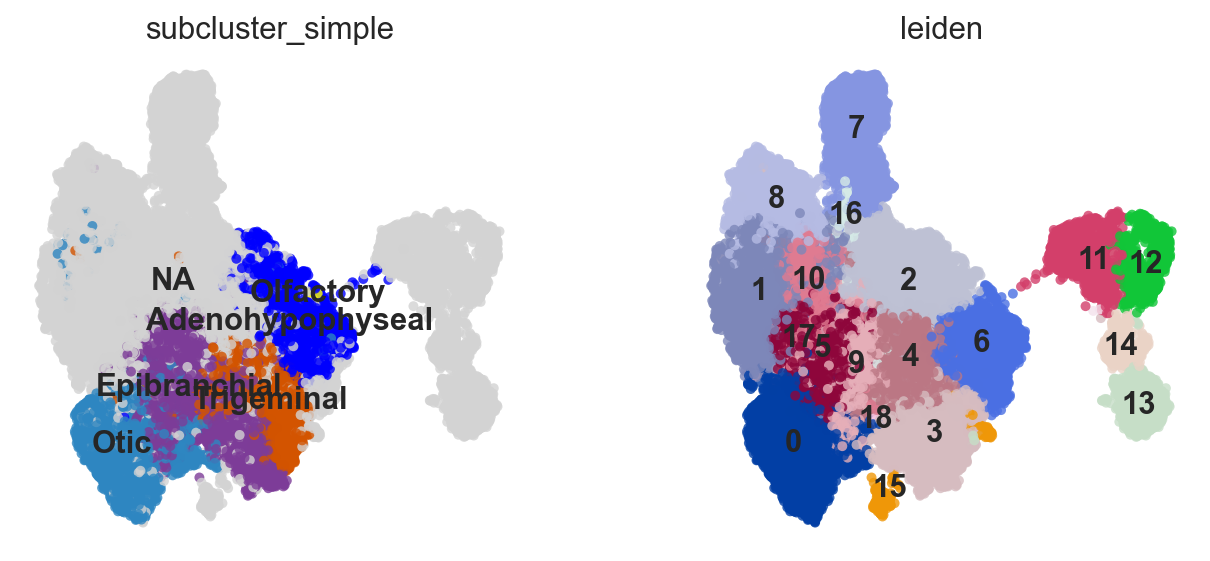

In [32]:
sc.pl.umap(
    adata, 
    color=['subcluster_simple', 'leiden',],
    frameon=False, 
    size=80, legend_loc='on data',
    alpha=0.8, #save='E8_placodes_5_12_2025.svg'
)


In [33]:
adata.obs.head(5)

,plate,day,location,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,n_genes,doublet_score,predicted_doublet,batch,leiden,cluster_annotations,subcluster,subcluster_simple
AAACCCAAGGTTCCAT-1,P27217_1001,e_8.5,head,7550,48373.0,777.0,1.606268,7550,0.074842,False,0,12,Neural tube,NA,NA
AAACCCAGTAAGTAGT-1,P27217_1001,e_8.5,head,7495,56462.0,1376.0,2.437037,7495,0.053381,False,0,3,Placodes,NA,NA
AAACCCAGTCGAGATG-1,P27217_1001,e_8.5,head,7745,51452.0,878.0,1.706445,7745,0.015994,False,0,11,Neural tube,NA,NA
AAACCCATCTTTCTAG-1,P27217_1001,e_8.5,head,6427,34047.0,289.0,0.848827,6427,0.017893,False,0,11,Neural tube,NA,NA
AAACGAACATCCGCGA-1,P27217_1001,e_8.5,head,6575,45708.0,581.0,1.271112,6575,0.008488,False,0,14,Neural crest,NA,NA


In [34]:
adata.obs['subcluster_simple'] = adata.obs['subcluster_simple'].astype('category')

In [35]:
adata.obs['subcluster_simple'] = adata.obs['subcluster_simple'].astype(str)

# assign labels
adata.obs.loc[adata.obs['leiden'] == '7', 'subcluster_simple'] = 'Procardiac epithelium'
adata.obs.loc[adata.obs['leiden'] == '8', 'subcluster_simple'] = 'Epidermis'
adata.obs.loc[adata.obs['leiden'].isin(['11','12']), 'subcluster_simple'] = 'Neural tube'
adata.obs.loc[adata.obs['leiden'].isin(['13','14']), 'subcluster_simple'] = 'Neural crest'

# convert back to categorical
adata.obs['subcluster_simple'] = adata.obs['subcluster_simple'].replace('nan', pd.NA).astype('category')

In [36]:
highlight_colors = {
    'Adenohypophyseal': 'blue',
    'Epibranchial': '#7d3c98',
    'Olfactory': 'yellow',
    'Otic': '#2e86c1',
    'Trigeminal': '#d35400',
    'Other ectoderm': 'lightgray'
}


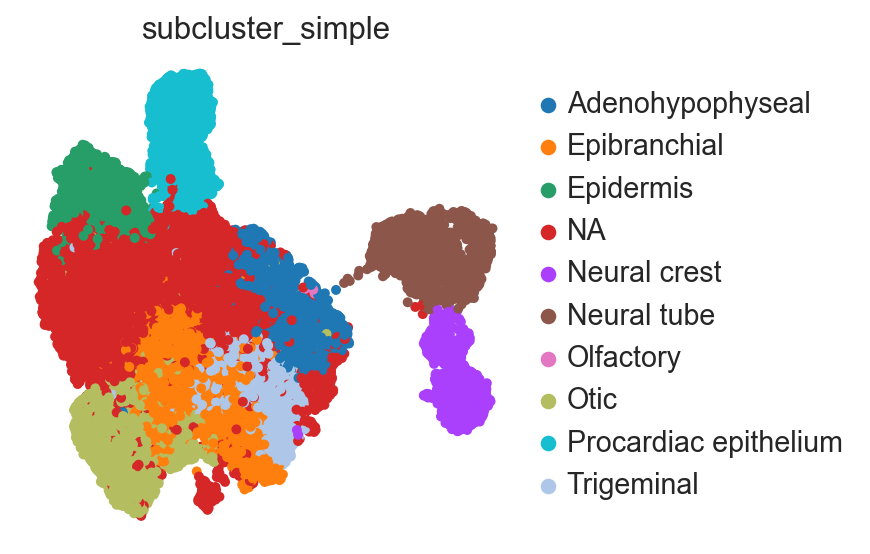

In [37]:
sc.pl.umap(adata, color='subcluster_simple', frameon=False, size=80)


In [36]:
adata.obs['subcluster_simple'] = adata.obs['subcluster_simple'].astype('category')

adata.obs['subcluster_simple'] = adata.obs['subcluster_simple'].cat.rename_categories({
    "NA": "Other ectoderm"
})


In [39]:
color_map = {
    'Adenohypophyseal': 'blue',
    'Epibranchial': '#7d3c98',
    'Olfactory': 'yellow',
    'Otic': '#2e86c1',
    'Trigeminal': '#d35400',
    'Other ectoderm': 'lightgrey',
    'Procardiac epithelium': '#27F5D6',
    'Epidermis': '#F2D177',   # <-- FIXED
    'Neural tube': '#FF69B4',
    'Neural crest': 'green',
}


In [40]:
adata.uns['subcluster_simple_colors'] = [
    color_map[c] for c in adata.obs['subcluster_simple'].cat.categories
]


In [41]:
# pink

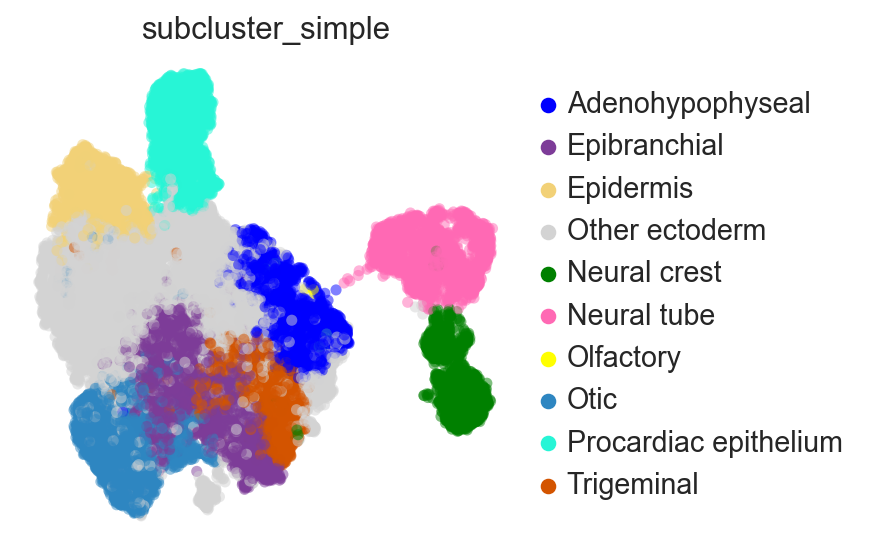

In [42]:
sc.pl.umap(
    adata,
    color='subcluster_simple',
    frameon=False,
    size=100,
    alpha=0.5, 
   # save='e8_just_pink_12_12.svg'
)


In [43]:
adata.write_h5ad('E8_umap_with_placodes_annotation.h5ad')

In [62]:
adata=sc.read('E8_umap_with_placodes_annotation.h5ad')

/home/julia/miniconda3/envs/Scanpy/lib/python3.12/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [63]:
adata

AnnData object with n_obs × n_vars = 32171 × 24684
    obs: 'plate', 'day', 'location', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'n_genes', 'doublet_score', 'predicted_doublet', 'batch', 'leiden', 'cluster_annotations', 'subcluster', 'subcluster_simple'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'cluster_annotations_colors', 'day_colors', 'hvg', 'leiden', 'leiden_colors', 'location_colors', 'log1p', 'neighbors', 'pca', 'rank_genes_groups', 'subcluster_simple_colors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

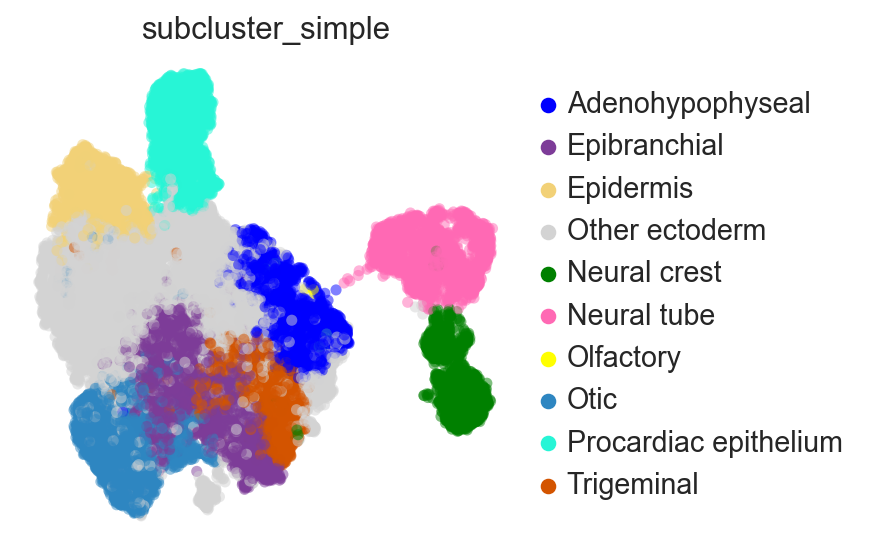

In [64]:
sc.pl.umap(
    adata,
    color='subcluster_simple',
    frameon=False,
    size=100,
    alpha=0.5,
  # save='e8_just_pink_12_12_v1.svg'
)


ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:11)


/home/julia/miniconda3/envs/Scanpy/lib/python3.12/site-packages/scanpy/tools/_rank_genes_groups.py:461: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/home/julia/miniconda3/envs/Scanpy/lib/python3.12/site-packages/scanpy/tools/_rank_genes_groups.py:461: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/home/julia/miniconda3/envs/Scanpy/lib/python3.12/site-packages/scanpy/tools/_rank_genes_groups.py:461: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/home/julia/miniconda3/envs/Scanpy/lib/python3.12/site-packages/scanpy/tools/_rank_genes_groups.py:461: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/home/julia/miniconda3/envs/Scanpy/lib/python3.12/site-packages/scanpy/tools/_rank_genes_groups.py:461: RuntimeWarning: invalid value encountered in log2
  self.stats[g

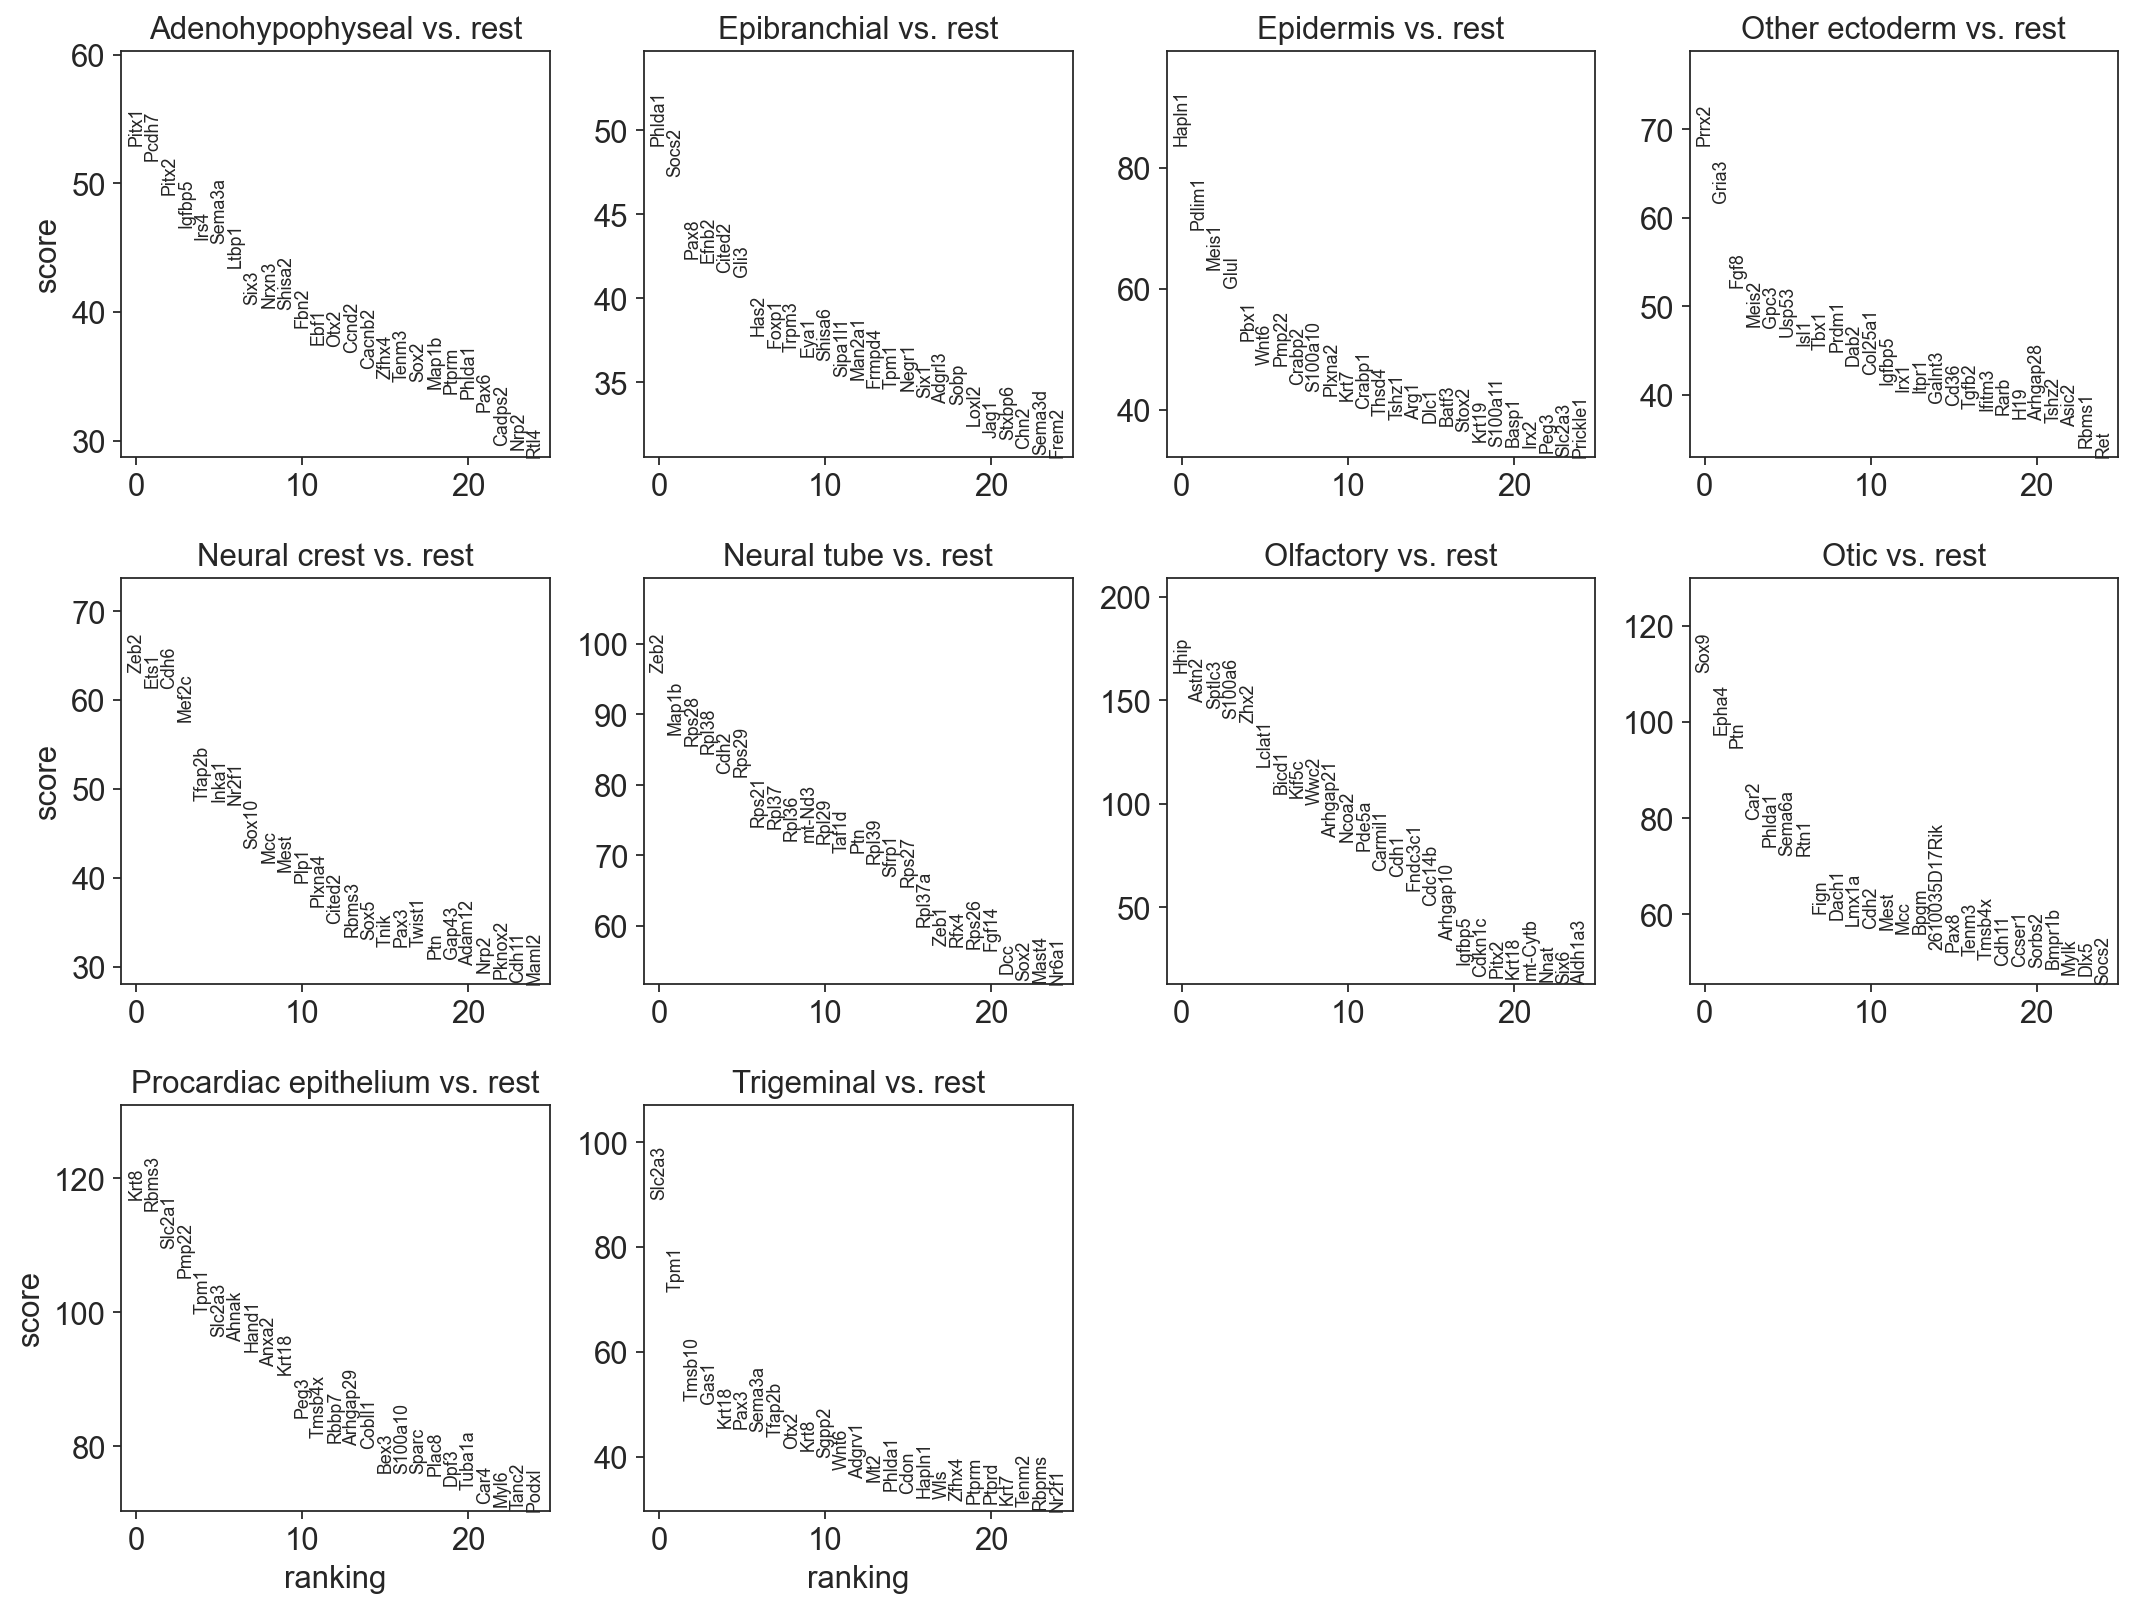

In [65]:
sc.tl.rank_genes_groups(adata, "subcluster_simple", mask_var="highly_variable", method="t-test")
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False)

In [66]:
pd.DataFrame(adata.uns["rank_genes_groups"]["names"]).head(15)

,Adenohypophyseal,Epibranchial,Epidermis,Other ectoderm,Neural crest,Neural tube,Olfactory,Otic,Procardiac epithelium,Trigeminal
0,Pitx1,Phlda1,Hapln1,Prrx2,Zeb2,Zeb2,Hhip,Sox9,Krt8,Slc2a3
1,Pcdh7,Socs2,Pdlim1,Gria3,Ets1,Map1b,Astn2,Epha4,Rbms3,Tpm1
2,Pitx2,Pax8,Meis1,Fgf8,Cdh6,Rps28,Sptlc3,Ptn,Slc2a1,Tmsb10
3,Igfbp5,Efnb2,Glul,Meis2,Mef2c,Rpl38,S100a6,Car2,Pmp22,Gas1
4,Irs4,Cited2,Pbx1,Gpc3,Tfap2b,Cdh2,Zhx2,Phlda1,Tpm1,Krt18
5,Sema3a,Gli3,Wnt6,Usp53,Inka1,Rps29,Lclat1,Sema6a,Slc2a3,Pax3
6,Ltbp1,Has2,Pmp22,Isl1,Nr2f1,Rps21,Bicd1,Rtn1,Ahnak,Sema3a
7,Six3,Foxp1,Crabp2,Tbx1,Sox10,Rpl37,Kif5c,Fign,Hand1,Tfap2b
8,Nrxn3,Trpm3,S100a10,Prdm1,Mcc,Rpl36,Wwc2,Dach1,Anxa2,Otx2
9,Shisa2,Eya1,Plxna2,Dab2,Mest,mt-Nd3,Arhgap21,Lmx1a,Krt18,Krt8


In [67]:
groupby = "subcluster_simple"
n_genes = 20

# --- 1) set the cluster order (rows) exactly as you want ---
cluster_order = [
    "Otic",
    "Epibranchial",
    "Trigeminal",
    "Adenohypophyseal",
    "Olfactory",
    "Neural tube",
    "Neural crest",
    "Procardiac epithelium",
    "Epidermis",
    "Other ectoderm",
]

adata.obs[groupby] = adata.obs[groupby].astype("category")
adata.obs[groupby] = adata.obs[groupby].cat.reorder_categories(cluster_order, ordered=True)

In [68]:
def beautiful_cmap(initial_cmap="Reds", grey_intensity=0.2, color_intencity=0.1):
  
    from matplotlib import cm
    from matplotlib.colors import ListedColormap
    import numpy as np
    
    cm_color = cm.get_cmap(initial_cmap, 128)
    cm_grey = cm.get_cmap("Greys", 128)
    
    c = ListedColormap(
        np.vstack(
            (cm_grey(np.linspace(0.2, 0.2, 1)),
             cm_color(np.linspace(0.1, 1, 128)))
    ))
    
    return c

reds_cmap = beautiful_cmap()
blues_cmap = beautiful_cmap("Blues")
rb_cmap = beautiful_cmap("RdBu_r")

/tmp/ipykernel_462492/2786226622.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cm_color = cm.get_cmap(initial_cmap, 128)
/tmp/ipykernel_462492/2786226622.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cm_grey = cm.get_cmap("Greys", 128)


In [69]:
genes_ordered2 =[
  #Otic
'Sox9', 'Epha4', 'Sema6a','Rtn1', 'Dach1', 'Lmx1a',   'Tbx2', 
# "Epibranchial",
'Neurog2', 'Efnb2',  'Has2',  'Shisa6', 'Frmpd4','Negr1', 'Loxl2',
# "Trigeminal",    
'Prdm12','Neurog1','Otx2', 'Gas1',  'Pax3', 'Sgpp2','Mt2','Cdon',
#    "Adenohypophyseal",    
'Pcdh7','Irs4','Rfx6',   'Nrxn3',  'Fbn2', 'Ebf1' ,"Nr2e1",
#    "Olfactory",
   'Dlx5','Dlx6', 'Hhip', 'Pitx2', 'S100a6', 'Zhx2',  'Nkx2-2',
#     "Neural tube", 
'Sox2', 'Sox1','Rfx4','Hes5',  'Nkx6-1','Sfrp1','Zeb1', 'Rfx4',
#     "Neural crest",
'Sox10','Foxd3','Tfap2b',  'Ets1', 'Tfap2b', 'Inka1', 'Nr2f1','Plp1',  'Twist1', 
#      "Procardiac epithelium",
'Hand1','Msx1', 'Msx2','Dpf3', 'Slc2a1', 'Plac8',  'Sparc',
#     "Epidermis",  
    'Krt7', 'Hapln1', 'Thsd4','Stox2',  'Krt5', 'Krt15',      'Krt17', 
#     "Other ectoderm",    
 'Gria3', 'Fgf8', 'Usp53', 'Tbx1',  'Col25a1',  'Irx1', 'Itpr1',]


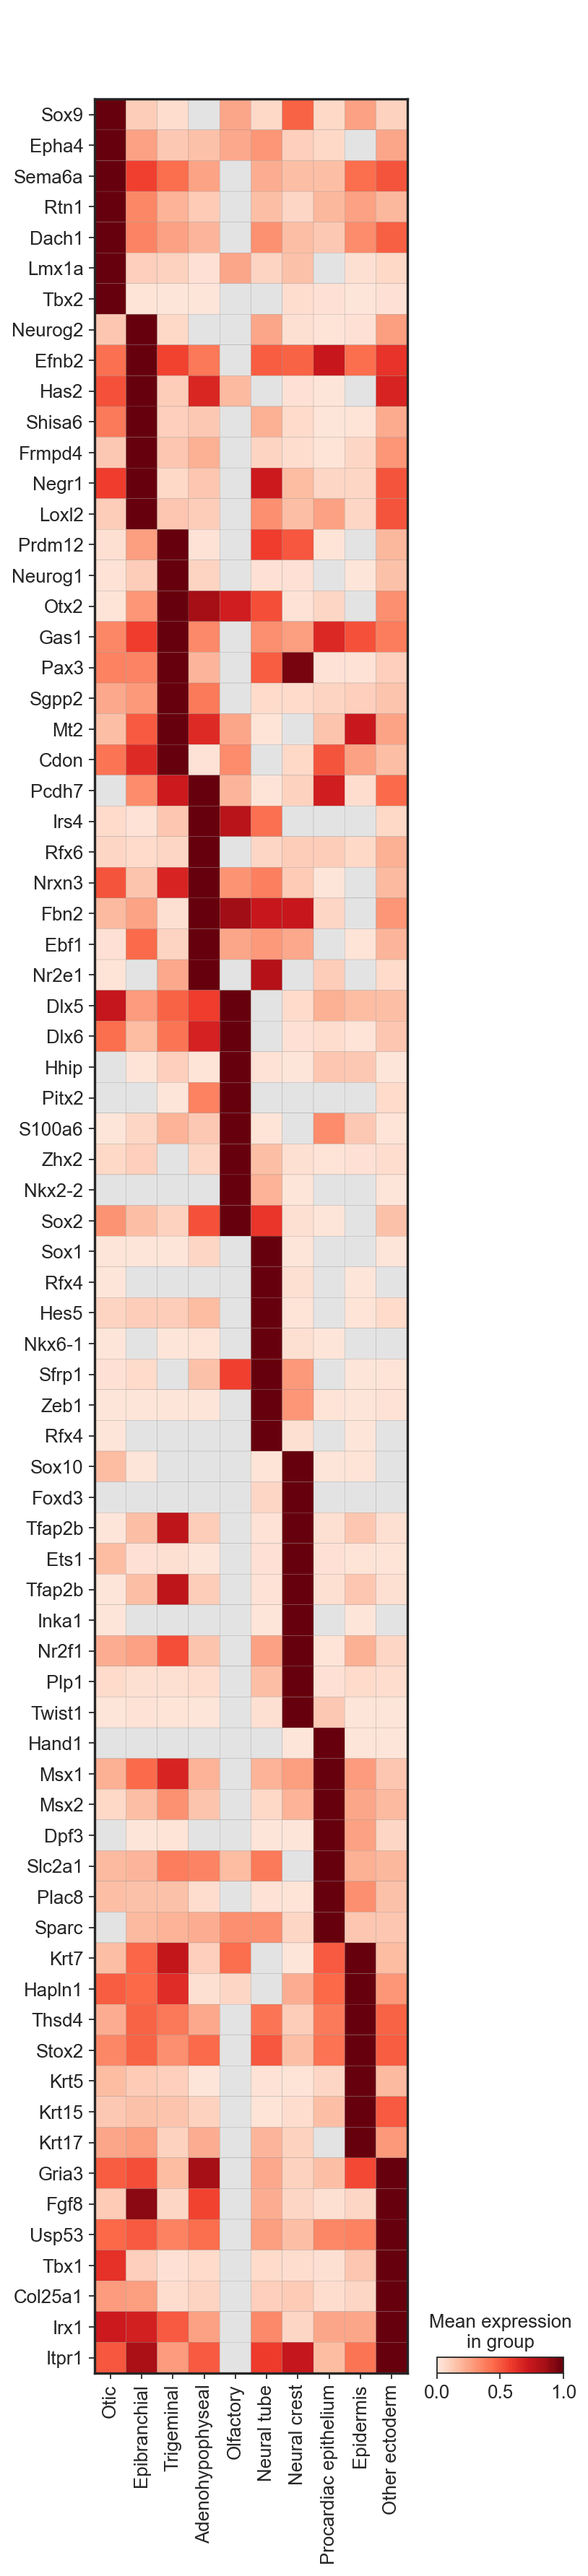

In [70]:
sc.pl.matrixplot(
    adata,
    var_names=genes_ordered2,
    groupby=groupby,
    use_raw=False,
    standard_scale="var",
  #  dendrogram=True,   # prevents re-ordering
cmap=reds_cmap,   swap_axes=True, #save='0_01_matrix_placodes_day8.svg'
)
